## Workspace setup

In [2]:
from datetime import datetime  
import uproot
from functools import partial
import numpy as np
import tensorflow as tf
import importlib

## Training dataset preparation

2023-06-02 09:09:45.283170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-02 09:09:47.344747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


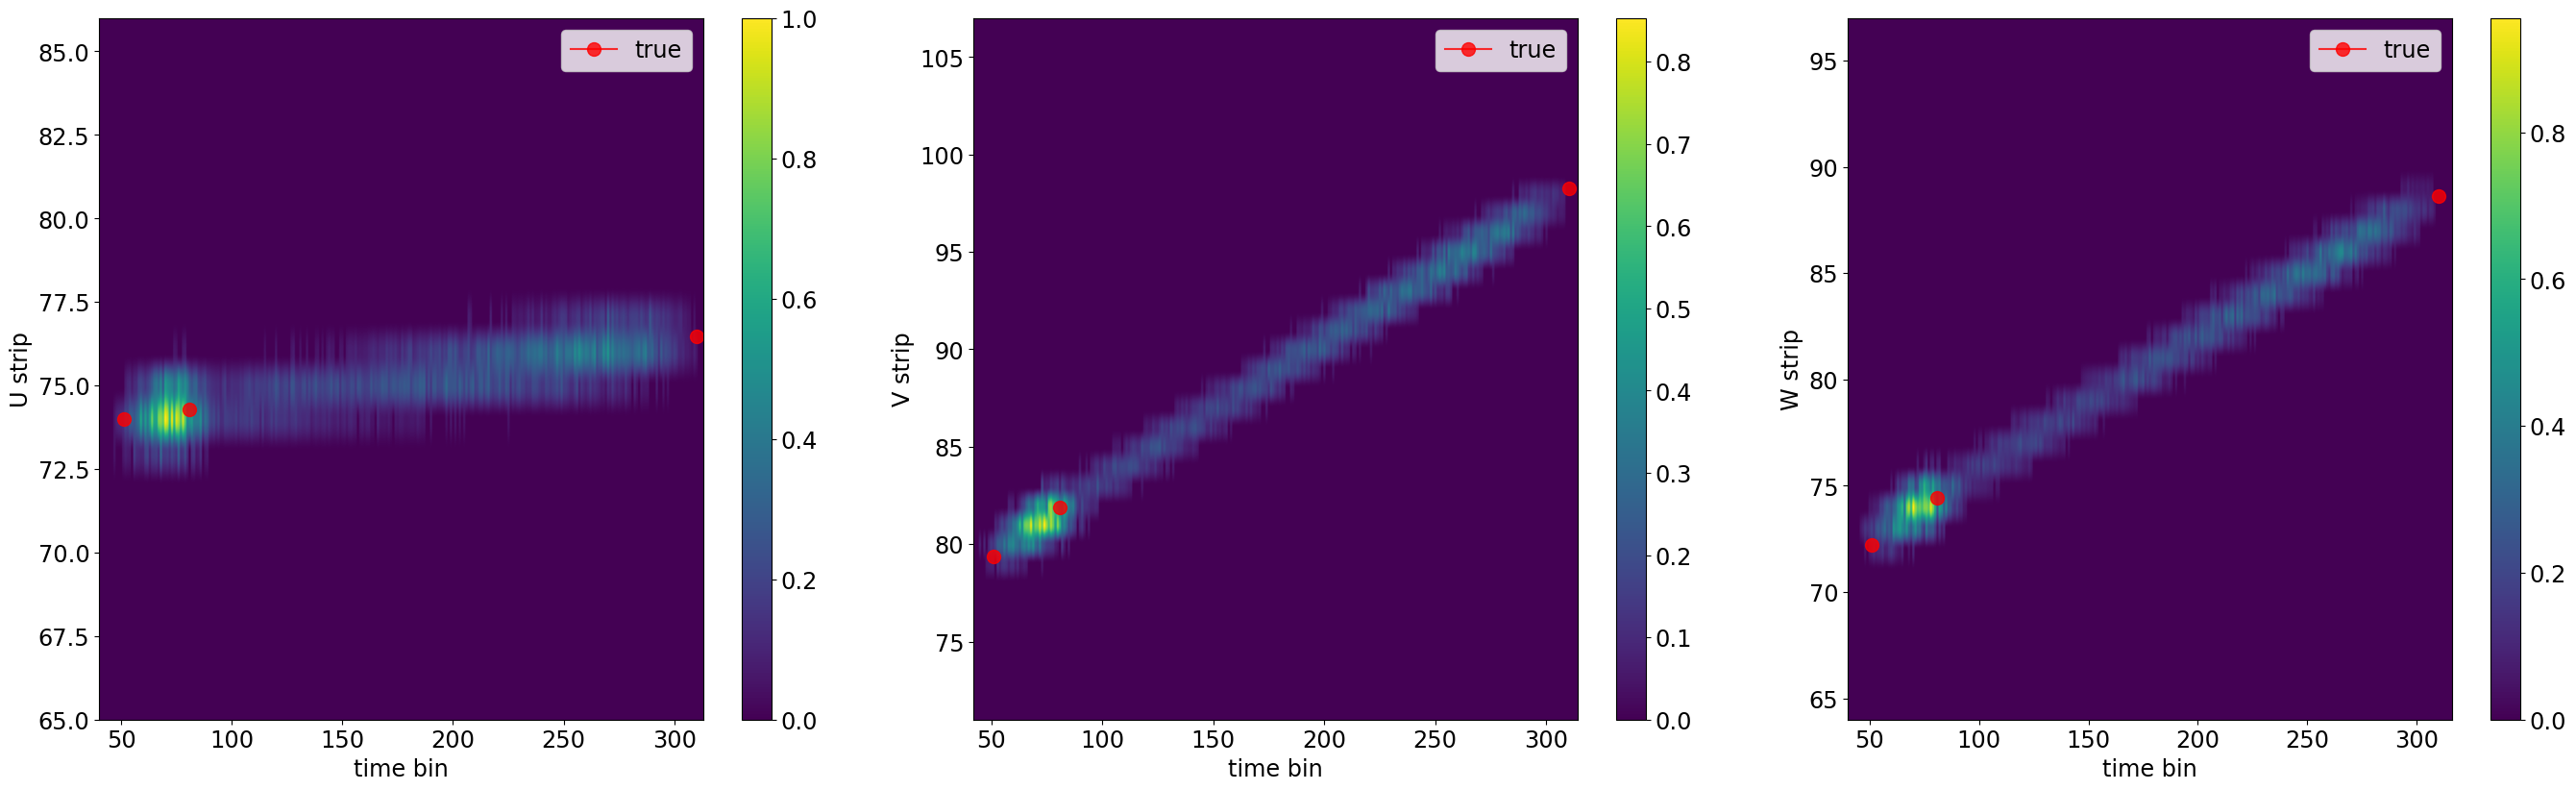

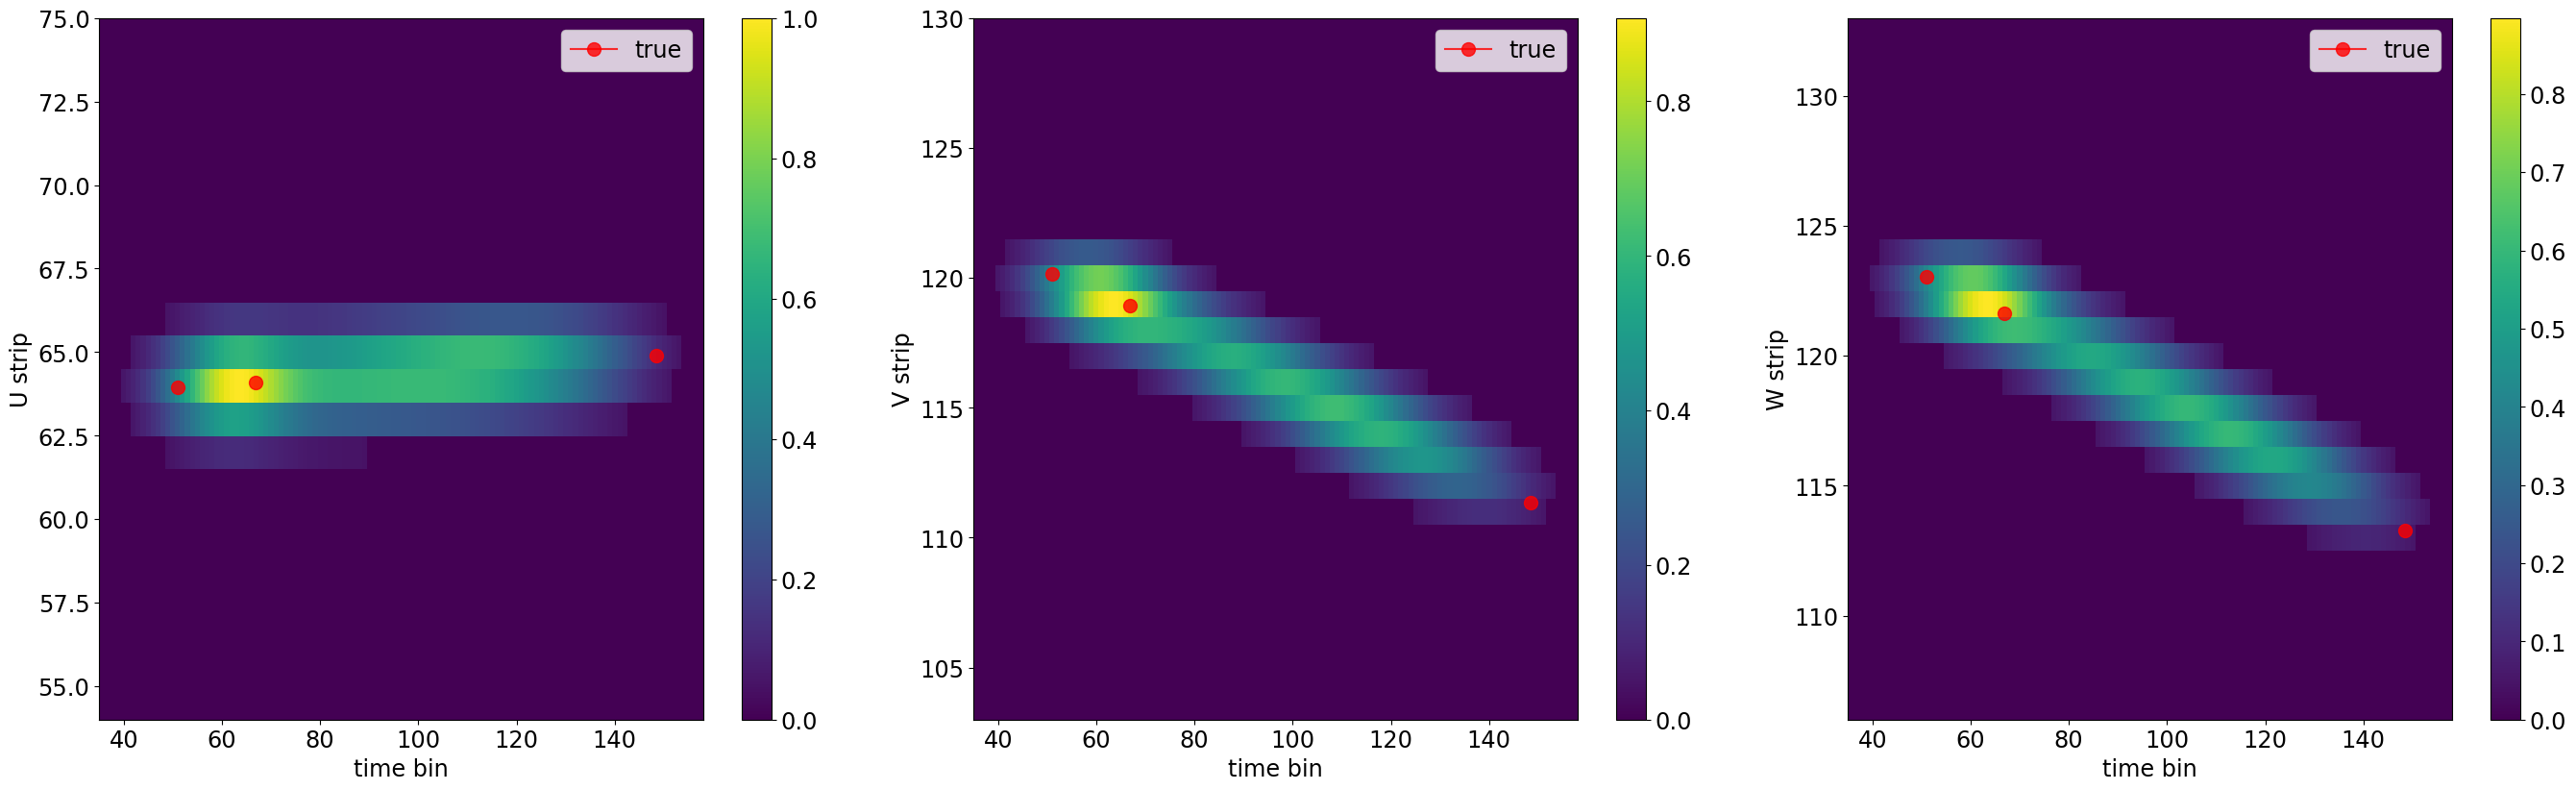

In [5]:
import io_functions as io
importlib.reload(io)

import plotting_functions as plf
importlib.reload(plf)

batchSize = 20

#dataPath = '/scratch_hdd/akalinow/ELITPC/data/PythonAnalysis/E_11_sigma_1.5/'
#train_files = [dataPath+'out_{1,2,3}.root:TPCData']

dataPath = '/scratch_hdd/akalinow/ELITPC/data/PythonAnalysis/E_11_sigma_flat_1_2/'
train_files = [dataPath+'out_random_sigma.root:TPCData']
            
datasetGenerator = partial(io.generator, files=train_files, batchSize=batchSize)

train_dataset = tf.data.Dataset.from_generator(
     datasetGenerator,
     output_signature=(
         tf.TensorSpec(shape=(batchSize,) + (io.projections.shape), dtype=tf.float32),
         tf.TensorSpec(shape=(batchSize,9), dtype=tf.float32)))

for aBatch in train_dataset.take(1):
    plf.plotEvent(aBatch, model=None)
    pass

dataPath = '/scratch_hdd/akalinow/ELITPC/data/PythonAnalysis/E_11_sigma_1.5/'
test_files = [dataPath+'out_4.root:TPCData']
datasetGenerator = partial(io.generator, files=test_files, batchSize=batchSize)

test_dataset = tf.data.Dataset.from_generator(
     datasetGenerator,
     output_signature=(
         tf.TensorSpec(shape=(batchSize,) + (io.projections.shape), dtype=tf.float32),
         tf.TensorSpec(shape=(batchSize,9), dtype=tf.float32)))
 
for aBatch in test_dataset.take(1):
    plf.plotEvent(aBatch, model=None)
    pass

## Model definition

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Resizing(height=128, width=128), 
  #tf.keras.layers.GaussianNoise(stddev=0.1),
  tf.keras.layers.Conv2D(16, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=5000,
                decay_rate=0.98,
                staircase=False)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule) 
model.compile(optimizer = optimizer, 
              loss = 'mse', 
              metrics=['mse']) 

## Model training

Epoch 1/20


2023-06-02 09:11:06.457503: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-06-02 09:11:06.457548: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-06-02 09:11:06.457592: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1679] Profiler found 1 GPUs
2023-06-02 09:11:06.563168: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-06-02 09:11:06.563454: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-06-02 09:11:06.620949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-02 09:11:08.540326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] 

      9/Unknown - 6s 264ms/step - loss: 0.1780 - mse: 0.1780

2023-06-02 09:11:12.862835: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-06-02 09:11:12.862901: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


     20/Unknown - 10s 306ms/step - loss: 0.1418 - mse: 0.1418

2023-06-02 09:11:16.522751: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-06-02 09:11:16.523739: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-06-02 09:11:16.551953: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 1757 callback api events and 1737 activity events. 
2023-06-02 09:11:16.560168: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


   5000/Unknown - 1082s 216ms/step - loss: 0.0090 - mse: 0.0090

2023-06-02 09:29:09.196170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5000/5000 [==============================] - 1085s 216ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/20


2023-06-02 09:29:11.303981: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


5000/5000 [==============================] - 803s 161ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3/20


2023-06-02 09:42:34.684080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


5000/5000 [==============================] - 777s 155ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4/20


2023-06-02 09:55:31.434632: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


5000/5000 [==============================] - 826s 165ms/step - loss: 7.5857e-04 - mse: 7.5857e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/20


2023-06-02 10:09:17.860397: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


5000/5000 [==============================] - 818s 164ms/step - loss: 6.2057e-04 - mse: 6.2057e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/20


2023-06-02 10:22:55.826855: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 503316480 exceeds 10% of free system memory.


5000/5000 [==============================] - 792s 158ms/step - loss: 5.2542e-04 - mse: 5.2542e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/20
5000/5000 [==============================] - 791s 158ms/step - loss: 4.5925e-04 - mse: 4.5925e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/20
5000/5000 [==============================] - 773s 155ms/step - loss: 4.0712e-04 - mse: 4.0712e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 9/20
5000/5000 [==============================] - 794s 159ms/step - loss: 3.6638e-04 - mse: 3.6638e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 10/20
5000/5000 [==============================] - 809s 162ms/step - loss: 3.3130e-04 - mse: 3.3130e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 11/20
5000/5000 [==============================] - 776s 155ms/step - loss: 3.0245e-04 - mse: 3.0245e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 12/20
5000/5000 [==============================] - 806s 161ms/step - loss: 2.7915e-04 - mse: 2.7915e-04 - val_loss: 0.0026 - va

INFO:tensorflow:Assets written to: training/0020_2023_Jun_02_13_37_57/assets


INFO:tensorflow:Assets written to: training/0020_2023_Jun_02_13_37_57/assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        5

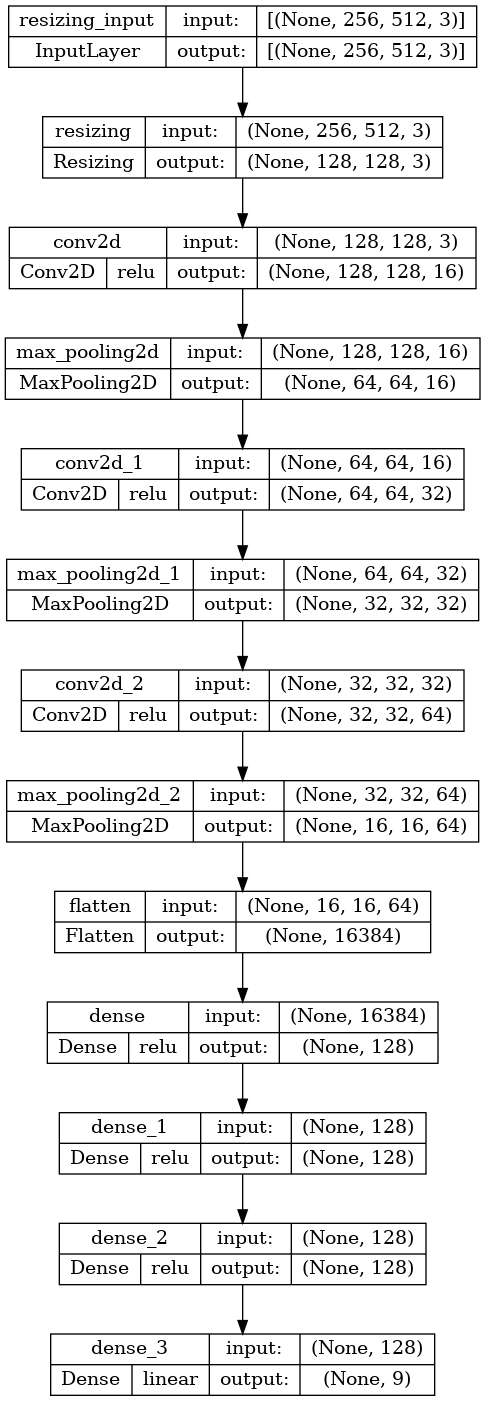

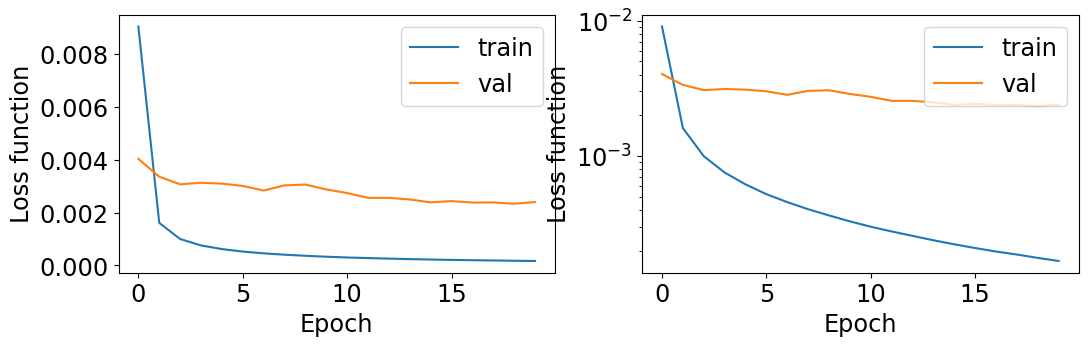

In [7]:
%%time

import plotting_functions as plf
importlib.reload(plf)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=(10, 20))
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)
callbacks =  [tensorboard_callback]

epochs=20
history = model.fit(train_dataset, 
                    epochs=epochs,
                    #verbose = 0,
                    workers = 3,
                    use_multiprocessing = True,
                    validation_data = test_dataset.take(10),
                    callbacks=callbacks
                    )
plf.plotTrainHistory(history)

current_time = datetime.now().strftime("%Y_%b_%d_%H_%M_%S")
print("Training start. Current Time =", current_time)

job_dir = "training/{epochs:04d}_"+current_time
model.save(job_dir.format(epochs=epochs), save_format='tf')

model.summary()
tf.keras.utils.plot_model(
    model, to_file="fig_png/model.png",
    show_shapes=True, show_dtype=False, show_layer_names=True,
    rankdir="TB", expand_nested=False,
    dpi=96, layer_range=None,
    show_layer_activations=True, show_trainable=False)

## Model performance on training data.

Fill Pandas DataFrame with true and response values.

Inference. Current Time = 2023_Jun_02_08_36_38


2023-06-02 08:39:17.989115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


CPU times: user 2min 23s, sys: 35.2 s, total: 2min 58s
Wall time: 2min 47s


,GEN_StartPosX,GEN_StartPosY,GEN_StartPosZ,GEN_StopPosX_Part1,GEN_StopPosY_Part1,GEN_StopPosZ_Part1,GEN_StopPosX_Part2,GEN_StopPosY_Part2,GEN_StopPosZ_Part2,RECO_StartPosX,RECO_StartPosY,RECO_StartPosZ,RECO_StopPosX_Part1,RECO_StopPosY_Part1,RECO_StopPosZ_Part1,RECO_StopPosX_Part2,RECO_StopPosY_Part2,RECO_StopPosZ_Part2
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.210221,-0.025195,-38.550678,-1.305794,-0.087202,-38.528667,-0.238072,-0.019177,-38.551361,-1.712808,0.839341,-37.646717,0.269067,0.261961,-35.921795,-2.315103,0.823224,-37.755260
std,57.736366,9.975066,18.800367,69.971413,35.392815,23.081352,57.873447,10.857377,22.143818,56.858566,9.580867,18.396984,72.901123,34.814163,24.128498,56.831013,10.321741,21.677454
min,-99.994888,-19.975468,-52.946007,-230.171753,-180.271393,-160.544693,-110.854744,-29.131535,-52.946163,-103.617928,-22.851362,-58.606583,-245.332581,-132.774429,-84.662766,-113.500870,-28.862629,-60.807972
25%,-50.212770,-8.154796,-50.189458,-53.590239,-20.900330,-52.946163,-50.663444,-8.268098,-52.946163,-52.804436,-7.005432,-49.407526,-54.874829,-20.321630,-52.417801,-53.333405,-7.174268,-52.402447
50%,0.746146,-0.121709,-46.970955,-1.062624,0.065782,-52.946163,0.377222,-0.056747,-52.856037,-1.395761,1.134702,-46.315588,0.569645,0.872315,-48.241133,-2.096842,1.114167,-50.237120
75%,49.575257,8.052902,-33.850958,52.026340,20.769297,-30.102287,49.610434,8.147885,-30.426075,47.816933,8.734693,-31.616324,56.037970,21.117542,-25.362769,47.386349,8.765810,-28.514246
max,99.995995,19.987448,64.027122,255.200409,175.366196,153.839554,109.796524,29.723600,74.082649,102.832268,25.502348,65.214920,219.220154,126.183716,125.810028,109.607292,30.267658,74.359879


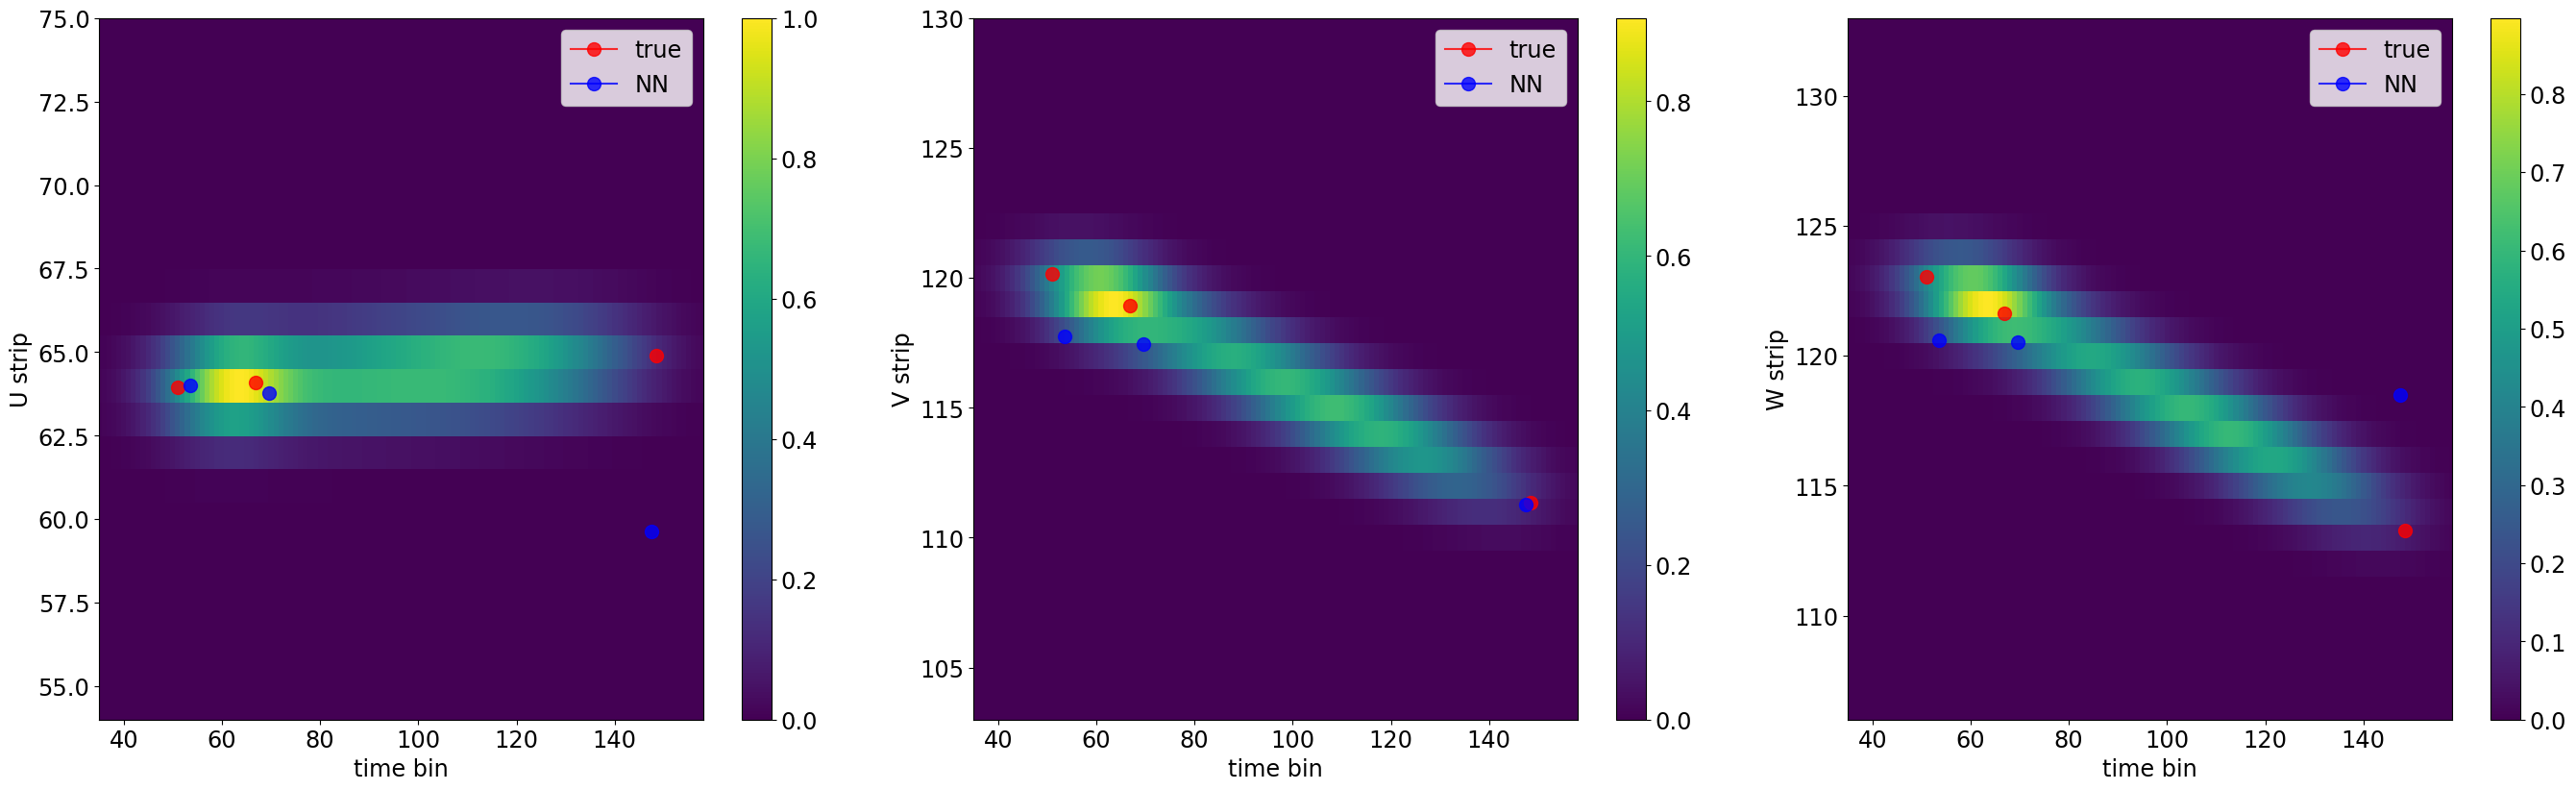

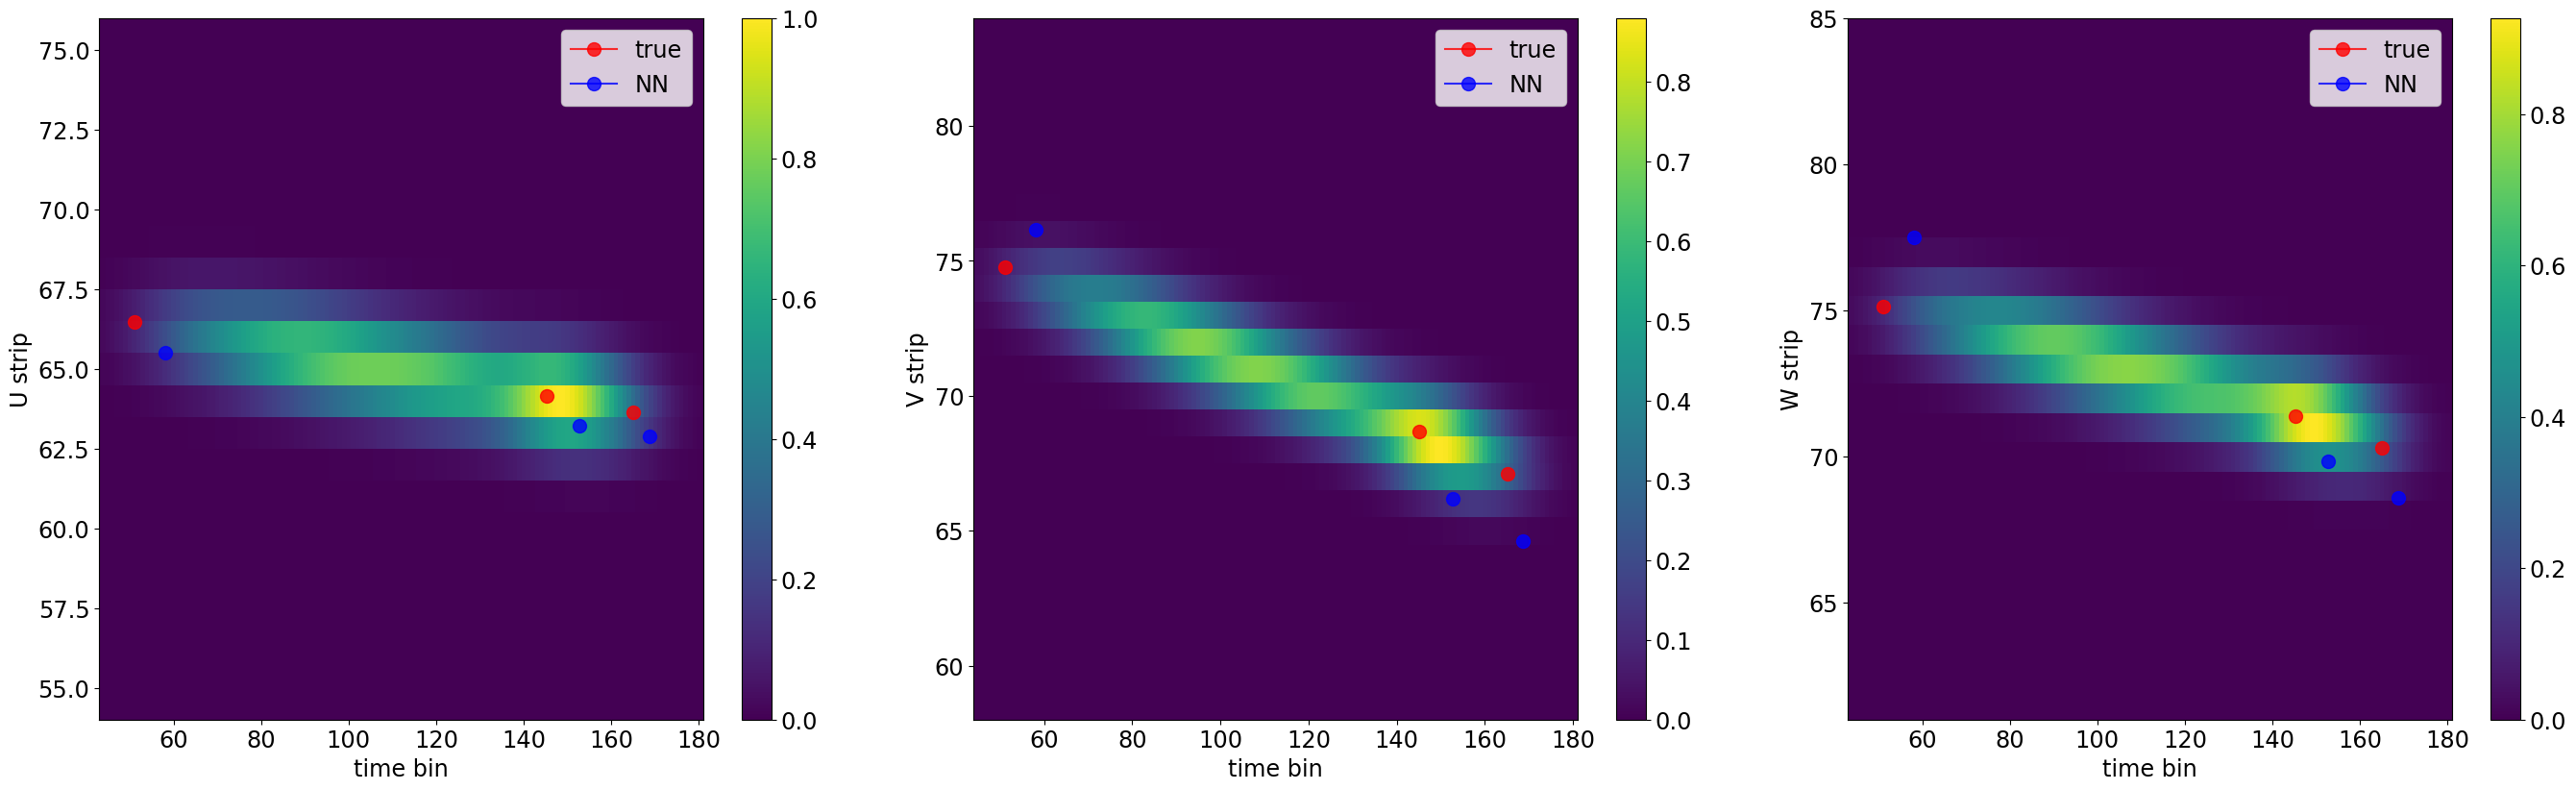

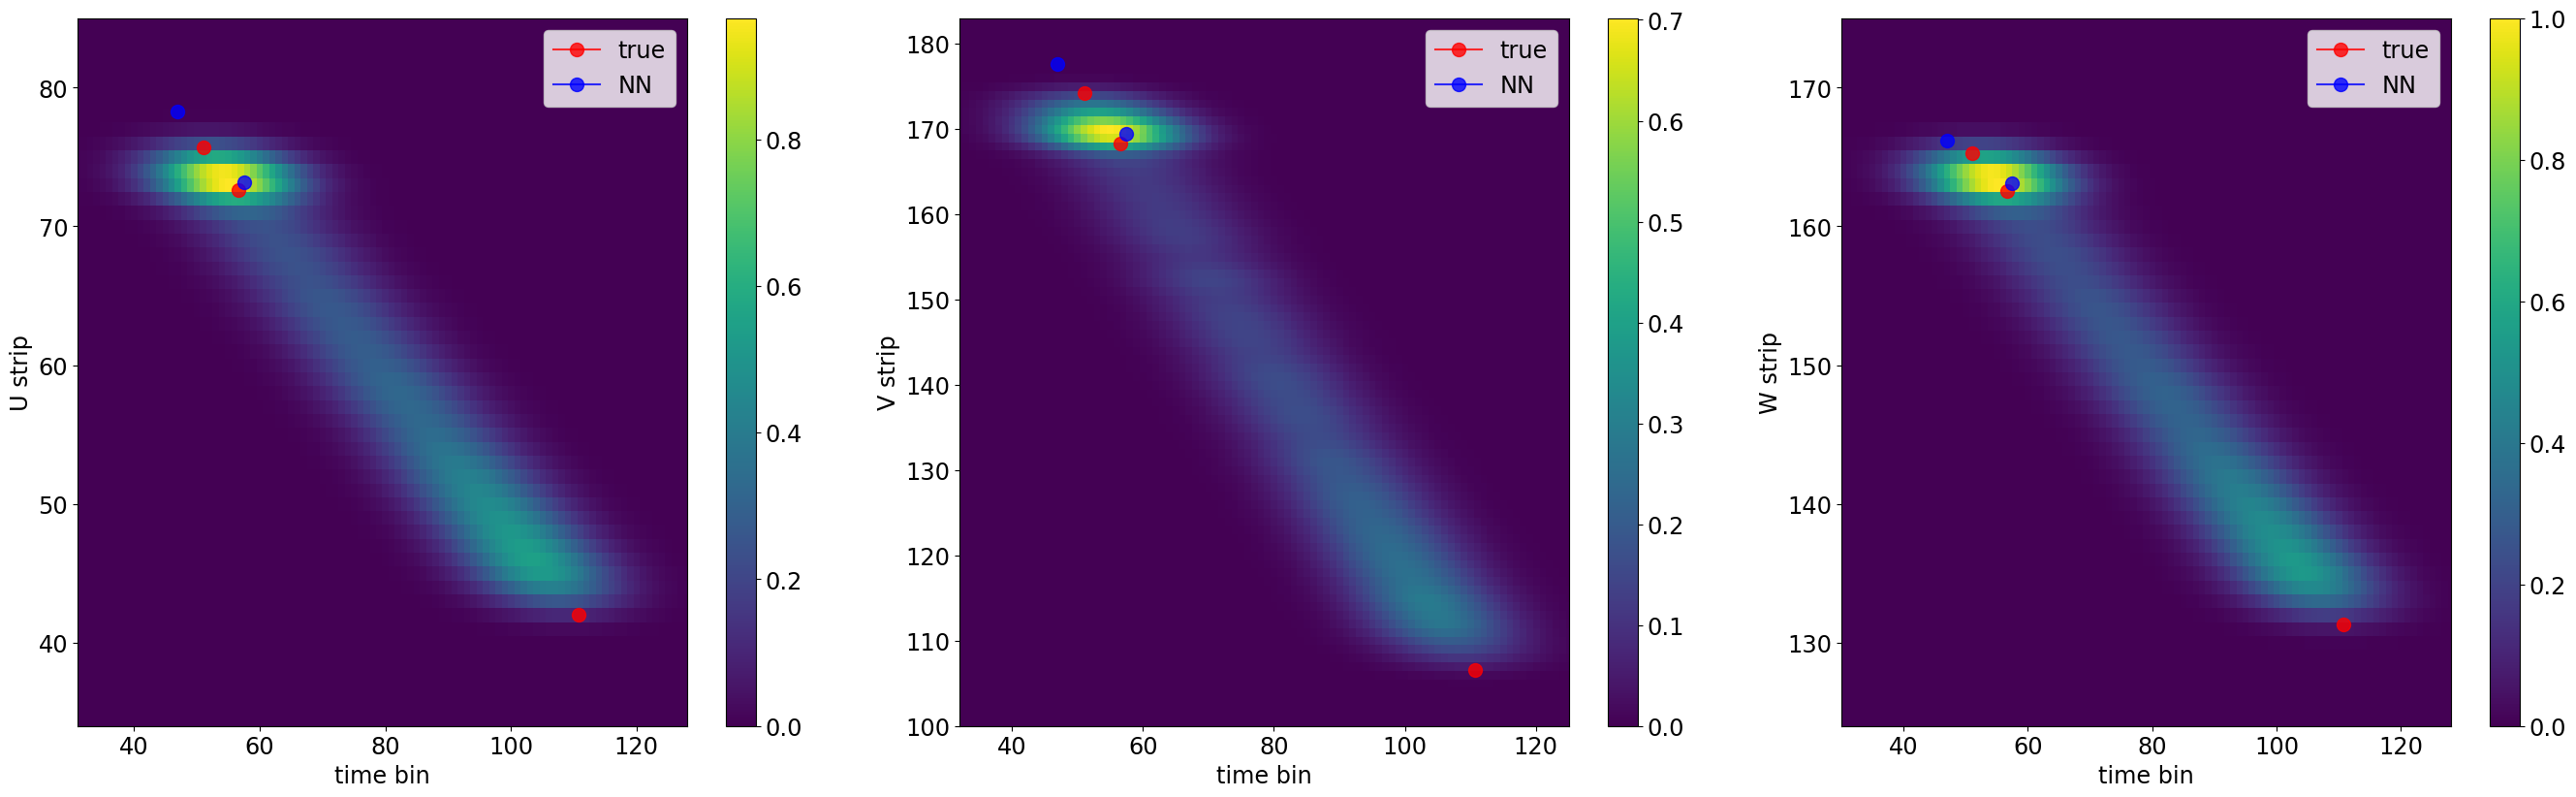

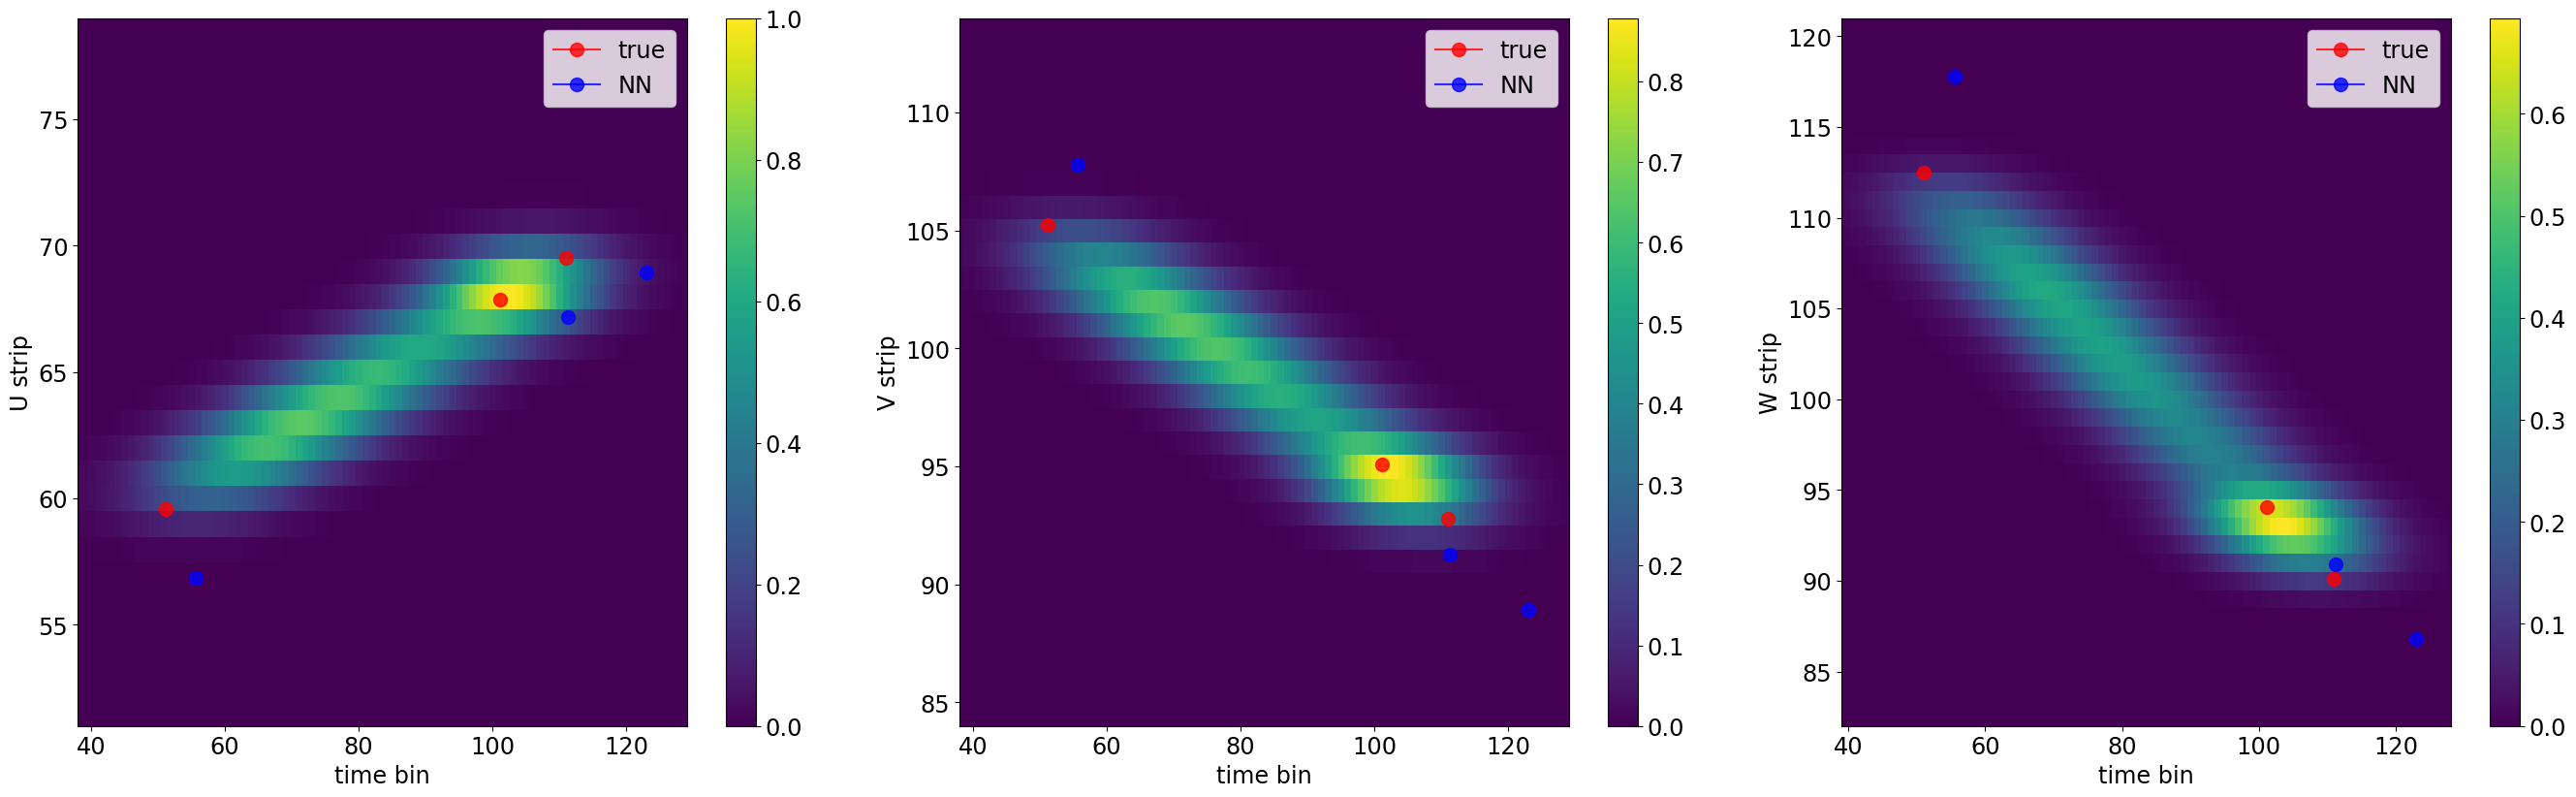

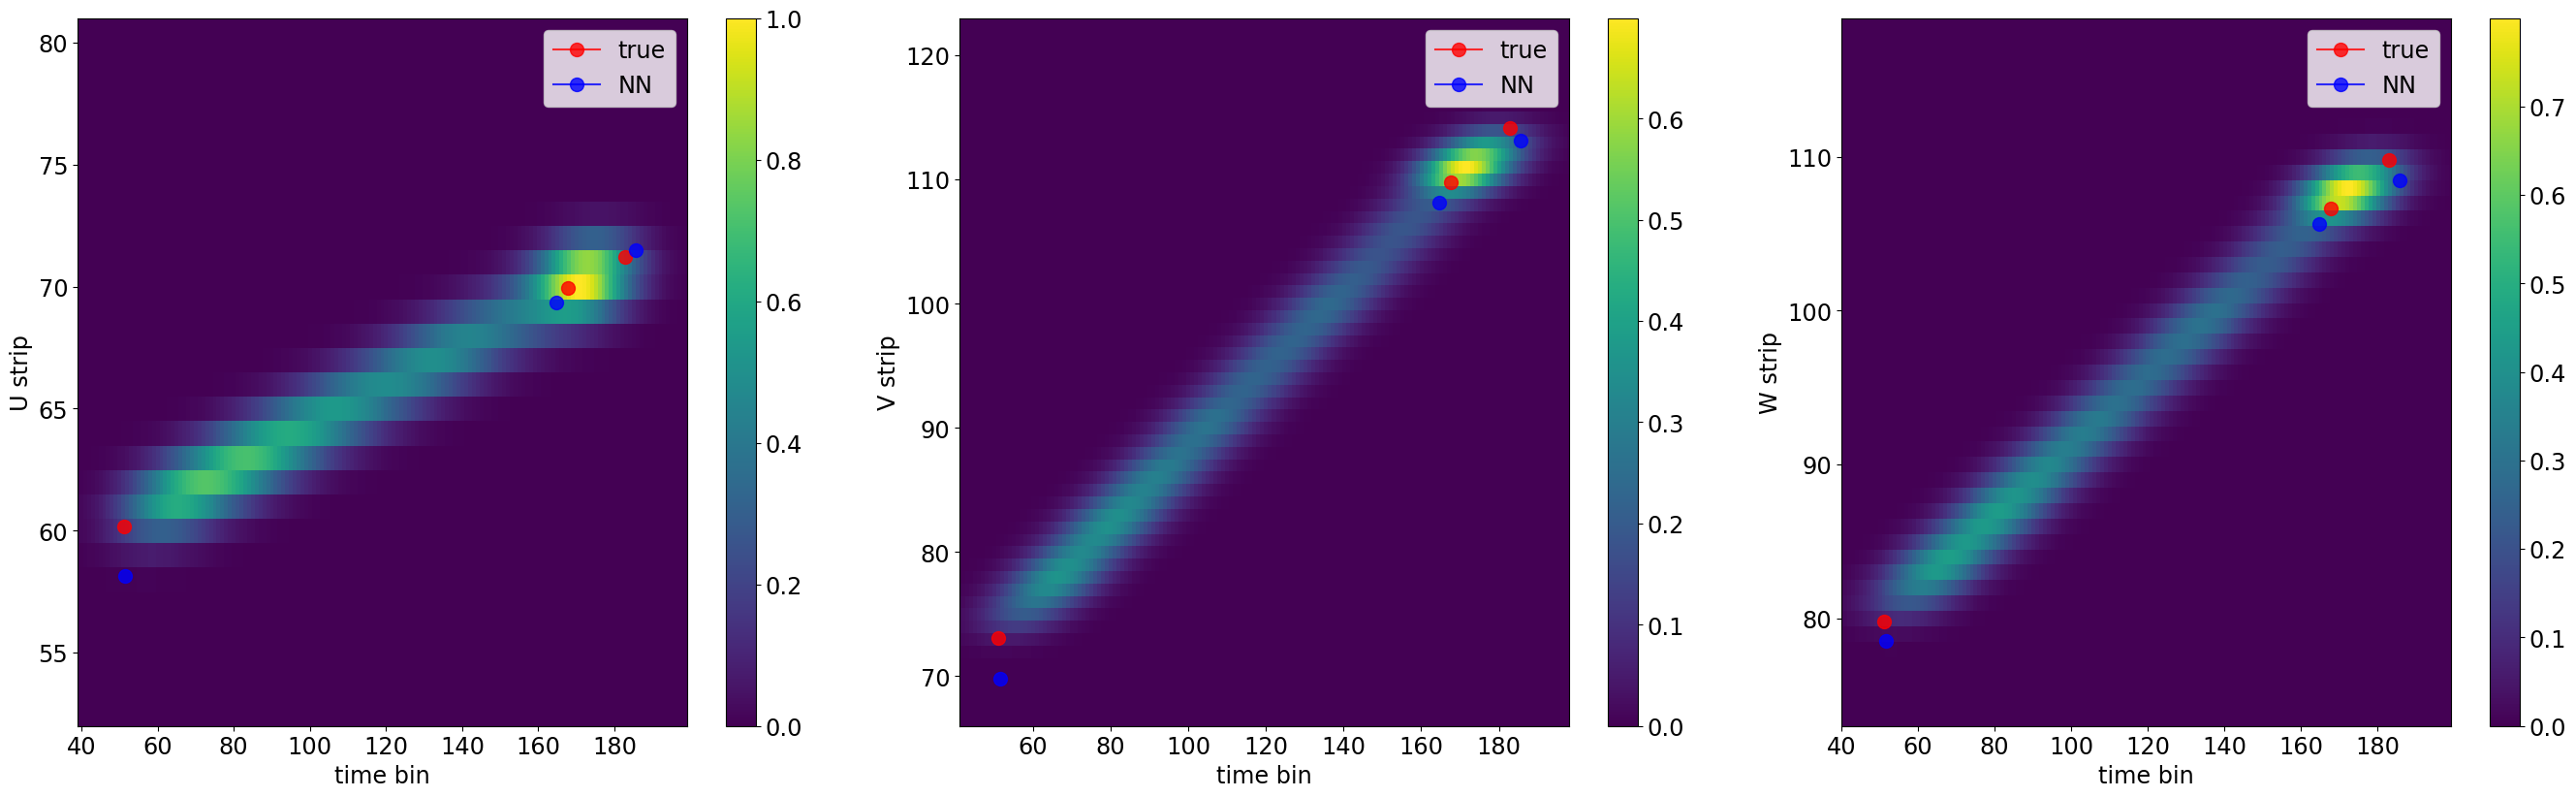

In [8]:
%%time
import utility_functions as utils
importlib.reload(utils)

current_time = datetime.now().strftime("%Y_%b_%d_%H_%M_%S")
print("Inference. Current Time =", current_time)

#model_path = "./training/2023_Apr_28_16_58_32/"
#model_path = "/scratch_hdd/akalinow/ELITPC/PythonAnalysis/training/2023_May_02_23_51_30/"
#model = tf.keras.models.load_model(model_path)

df = utils.df

for aBatch in test_dataset: 
    df = utils.fillPandasDataset(aBatch, df, model)     
    
for aBatch in test_dataset.take(5):
    plf.plotEvent(aBatch, model=model)

df.describe()    

### Resolution plots

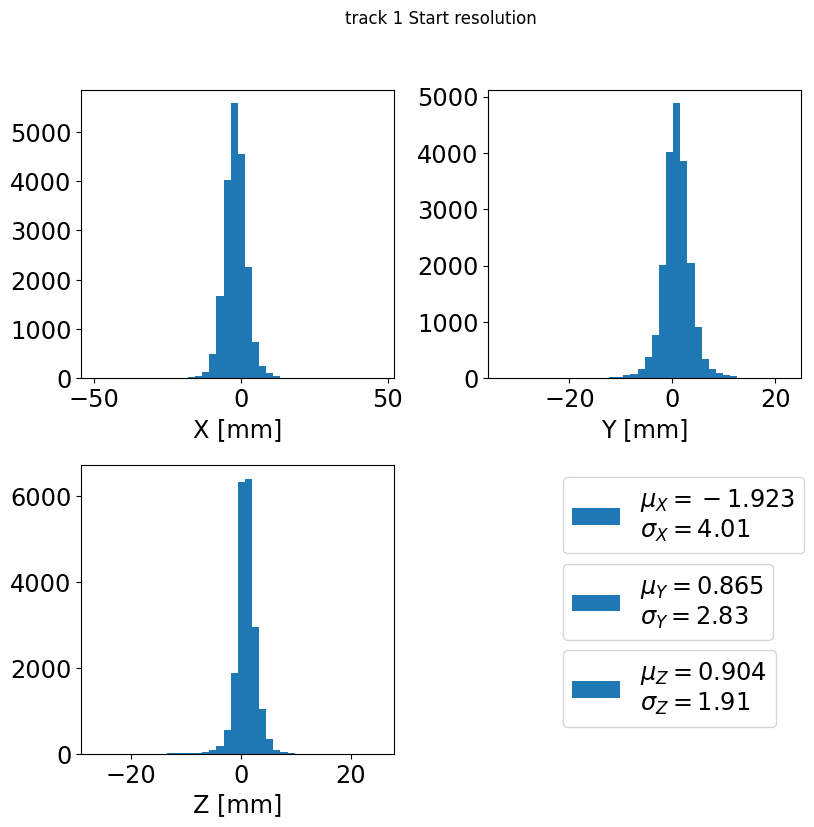

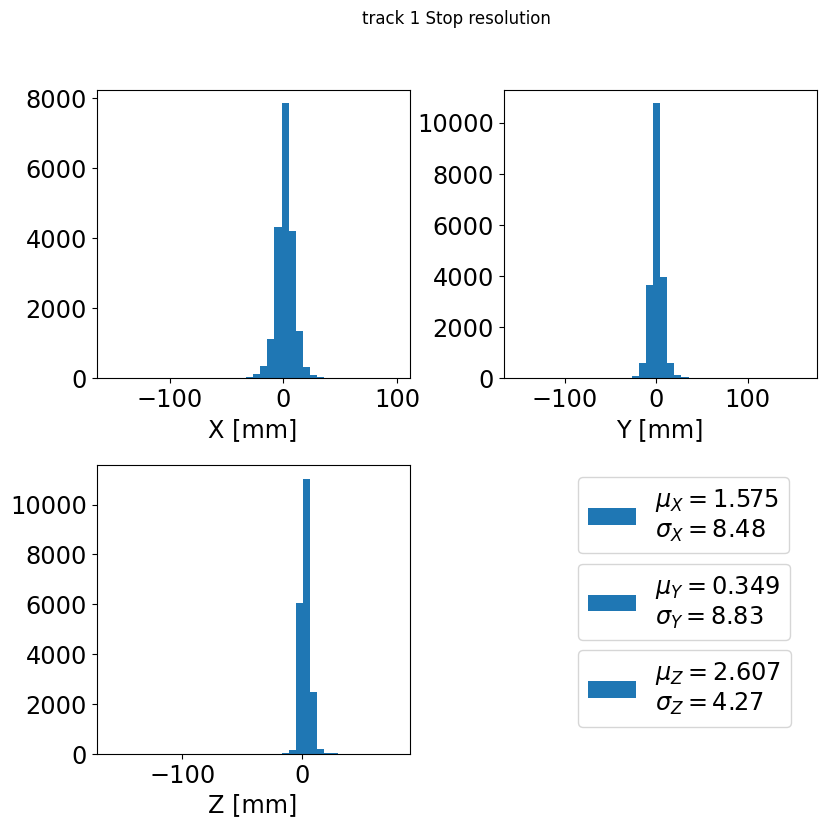

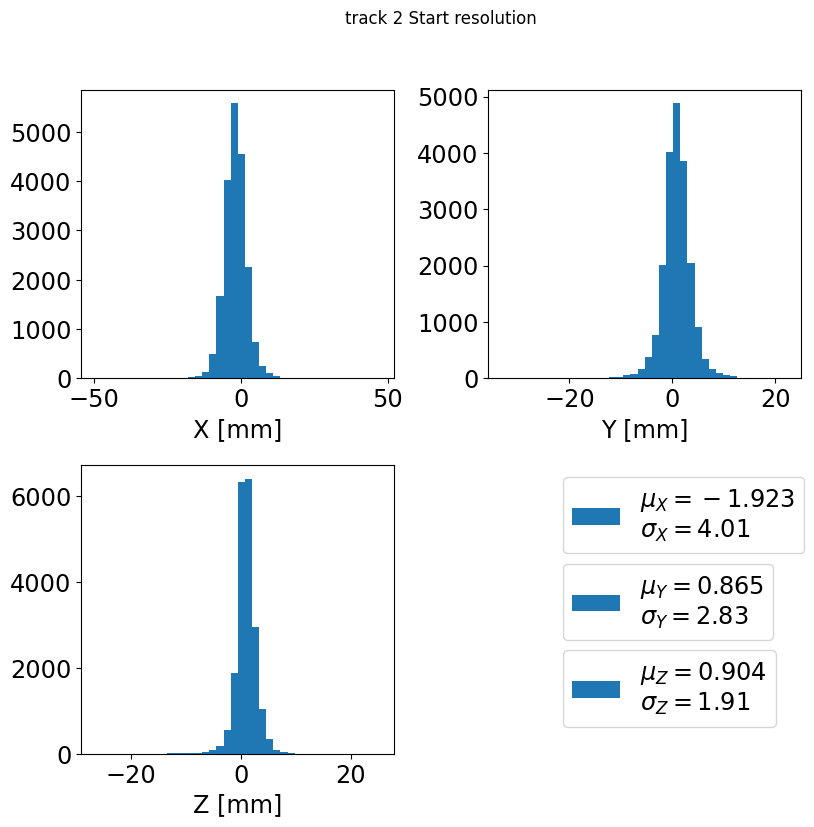

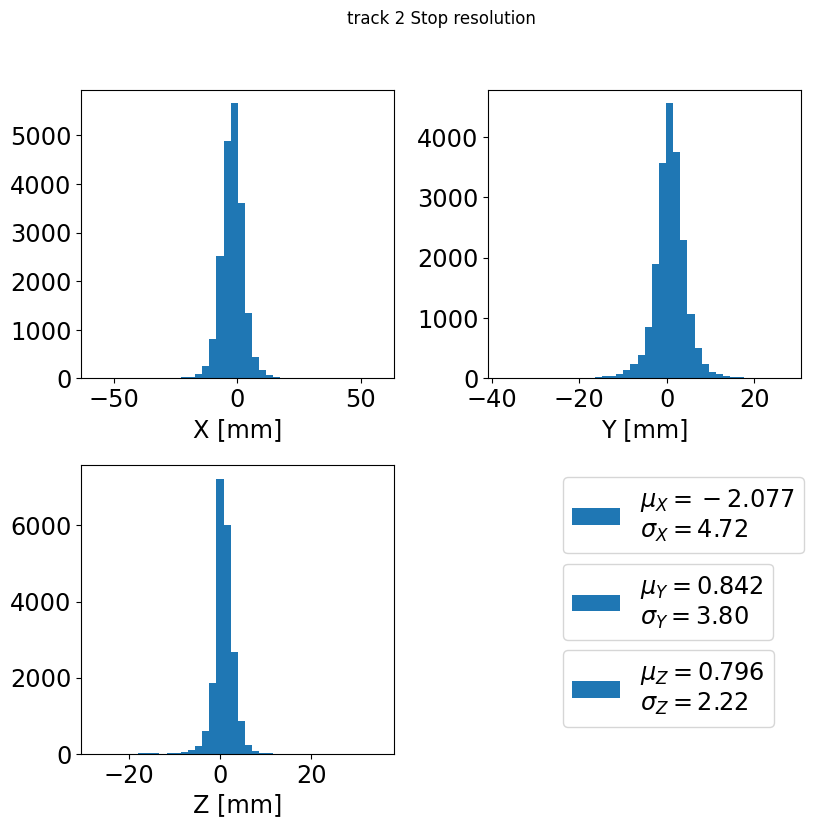

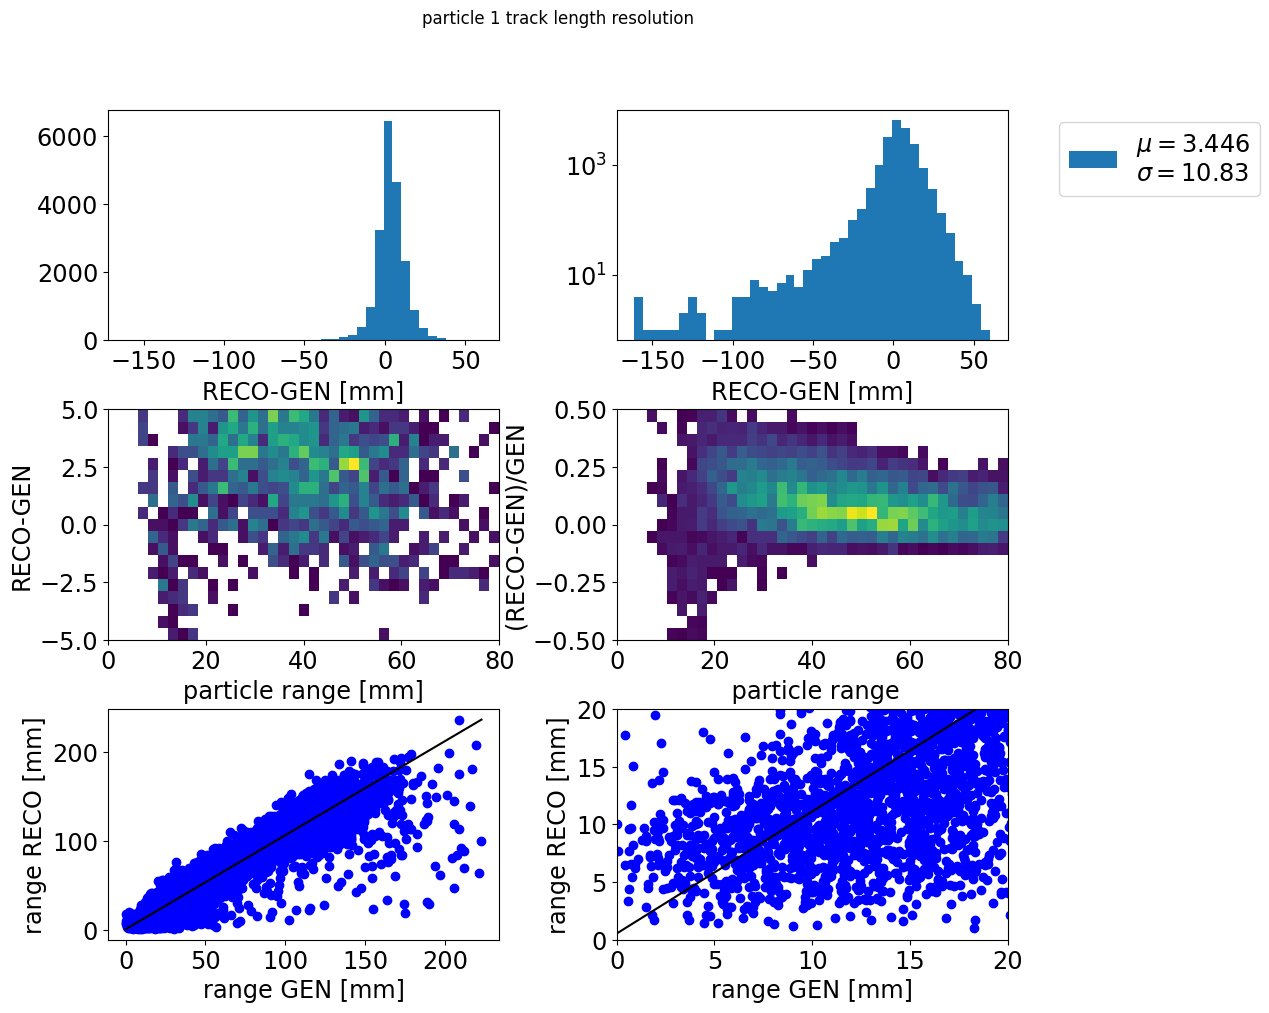

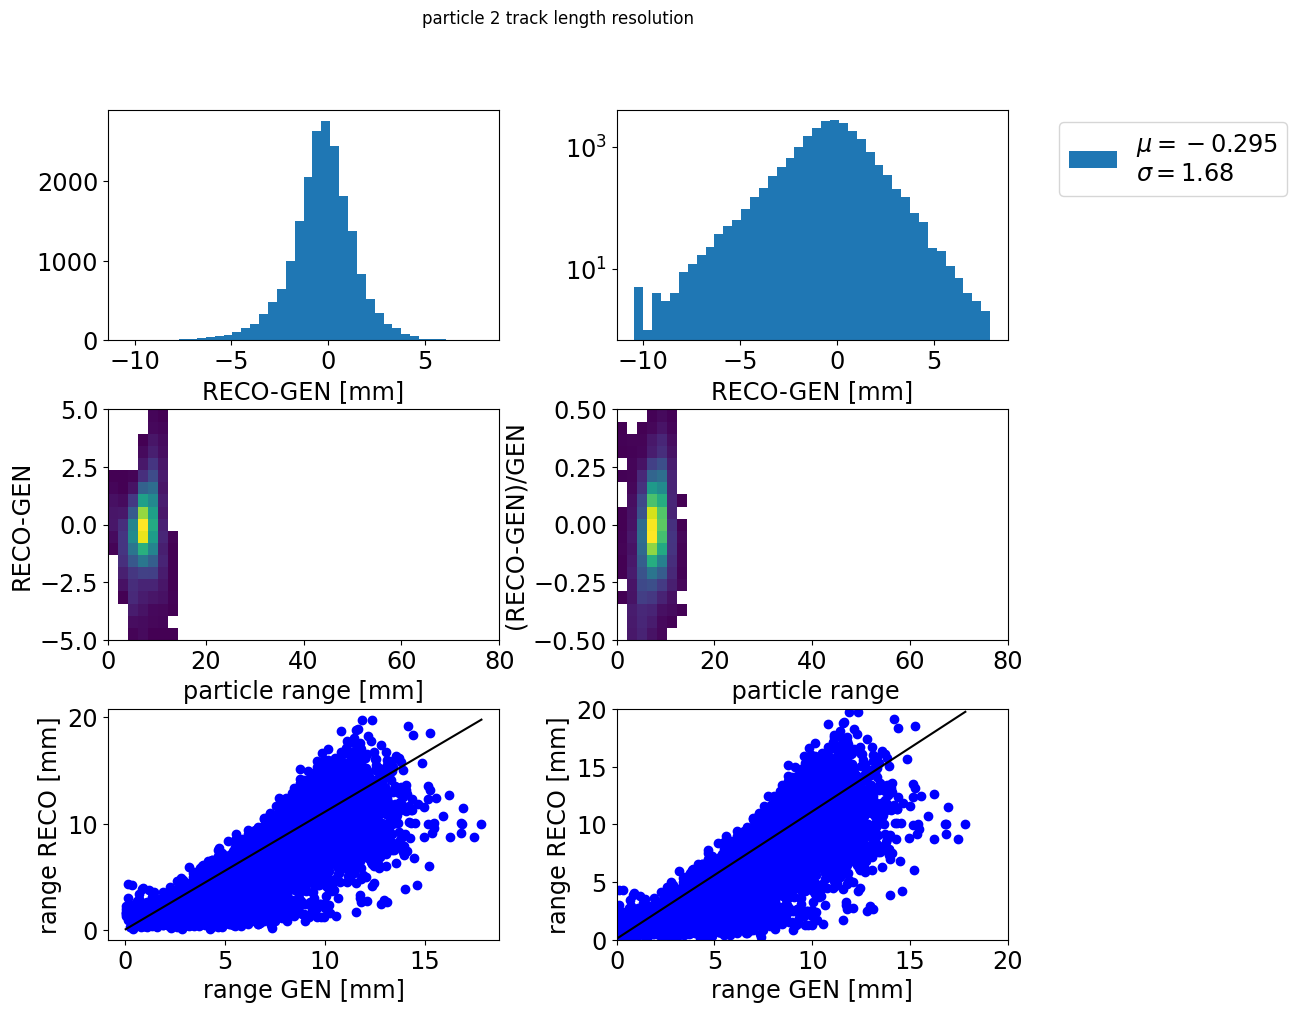

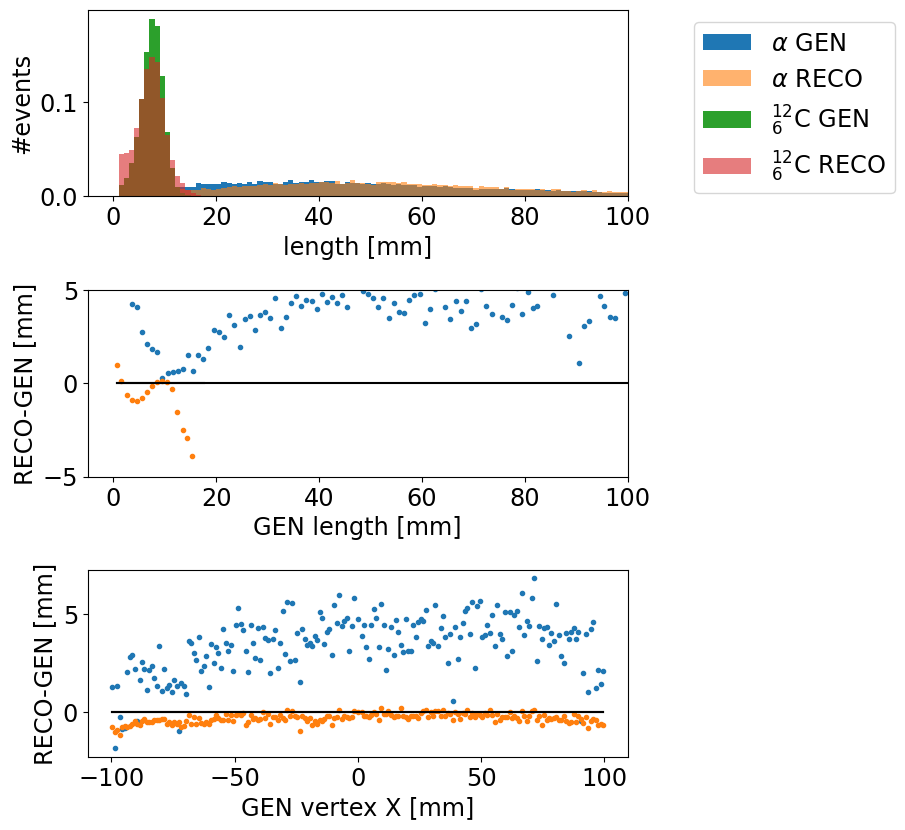

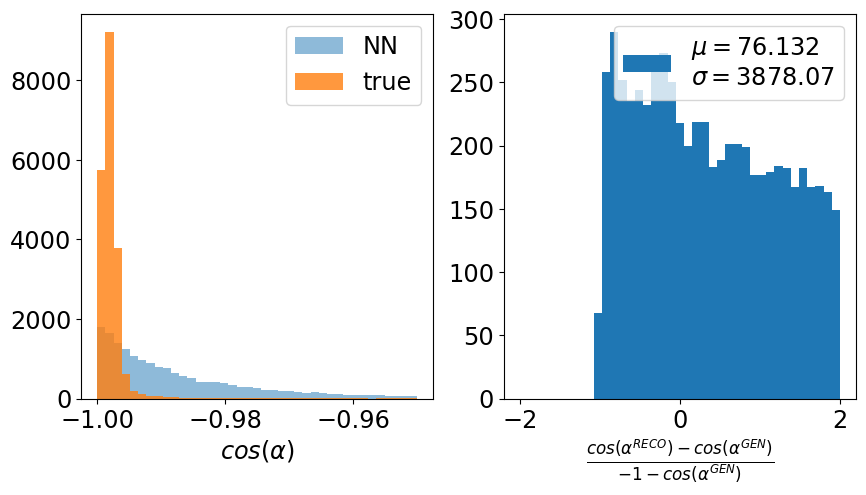

In [9]:
import plotting_functions as plf
importlib.reload(plf)

#plf.controlPlots(df)
plf.plotEndPointRes(df=df, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=2)

plf.plotLengthPull(df, partIdx=1)
plf.plotLengthPull(df, partIdx=2)
plf.plotLengthPullEvolution(df)
plf.plotOpeningAngleCos(df)

       GEN_StartPosX  GEN_StartPosY  GEN_StartPosZ  GEN_StopPosX_Part1  \
count    7668.000000    7668.000000    7668.000000         7668.000000   
mean       -1.233685       0.039508     -36.581066           -8.322292   
std        56.078217       9.981635      17.507959           62.071640   
min       -99.994888     -19.926653     -52.936871         -188.313568   
25%       -53.757044      -8.358707     -49.183220          -59.275455   
50%         5.220402      -0.088227     -45.032200           -2.802720   
75%        44.986631       8.301688     -27.881698           40.302917   
max        99.995995      19.955435      55.789871          192.388962   

       GEN_StopPosY_Part1  GEN_StopPosZ_Part1  GEN_StopPosX_Part2  \
count         7668.000000         7668.000000         7668.000000   
mean            -0.012575          -39.567745           -0.784151   
std             29.738657           20.504801           56.510090   
min           -141.898621          -80.722847         -10

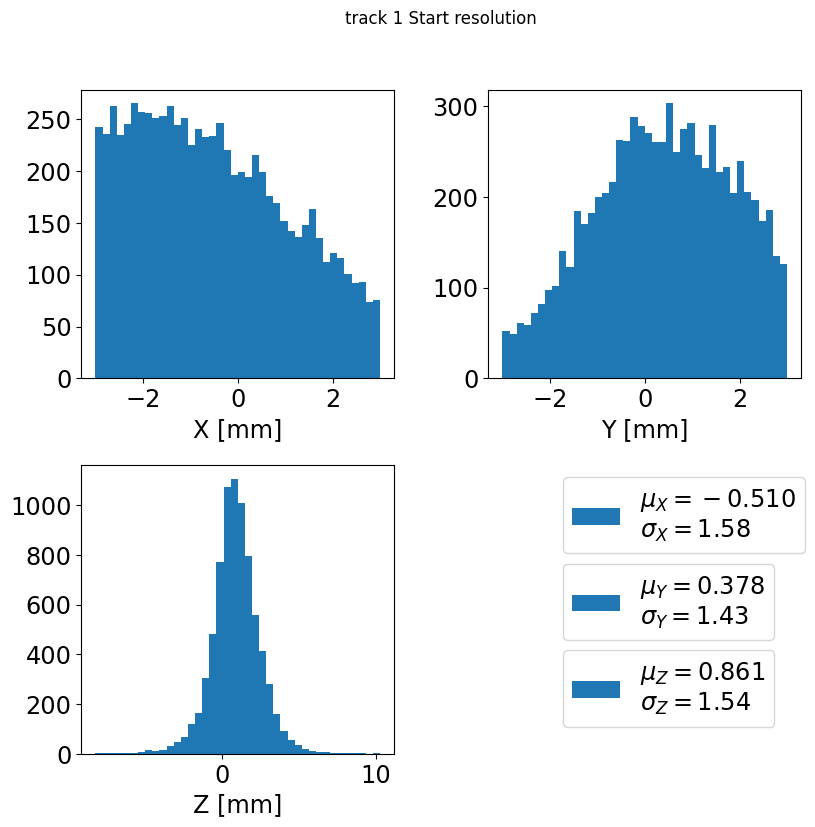

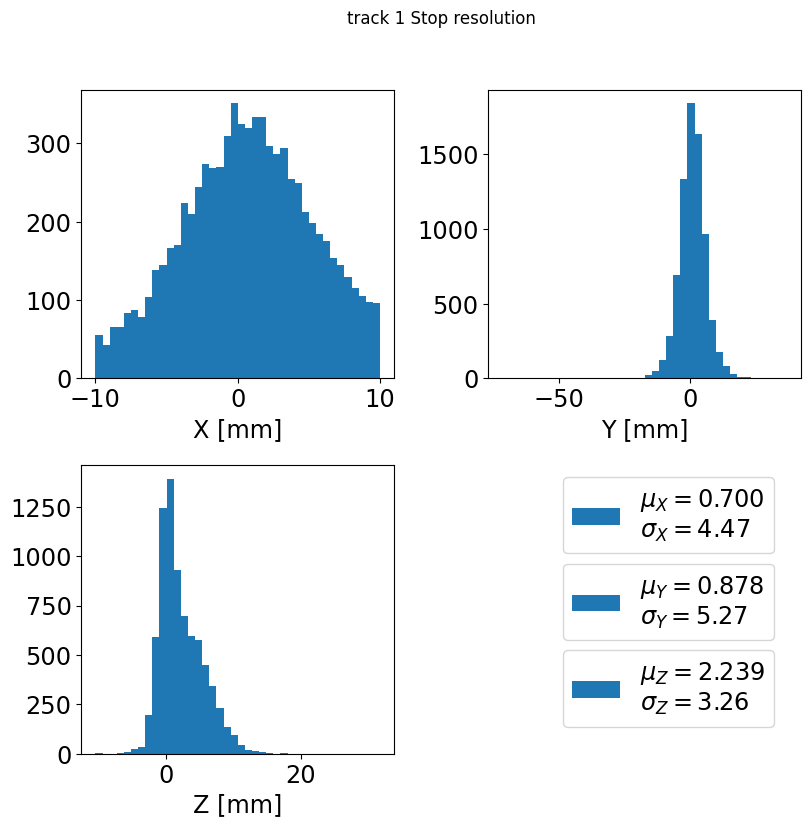

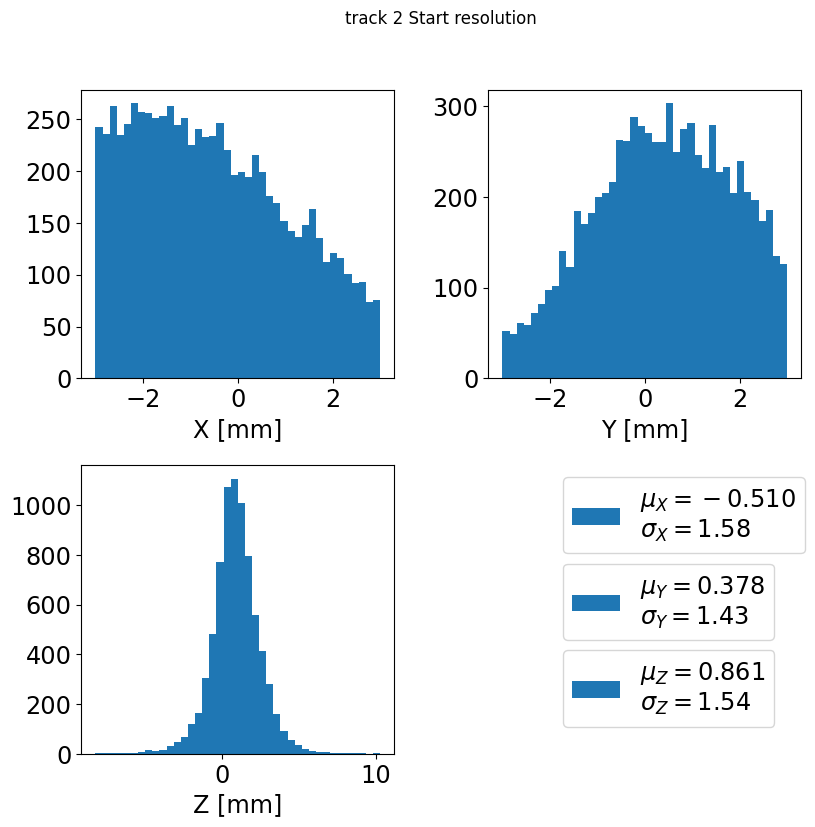

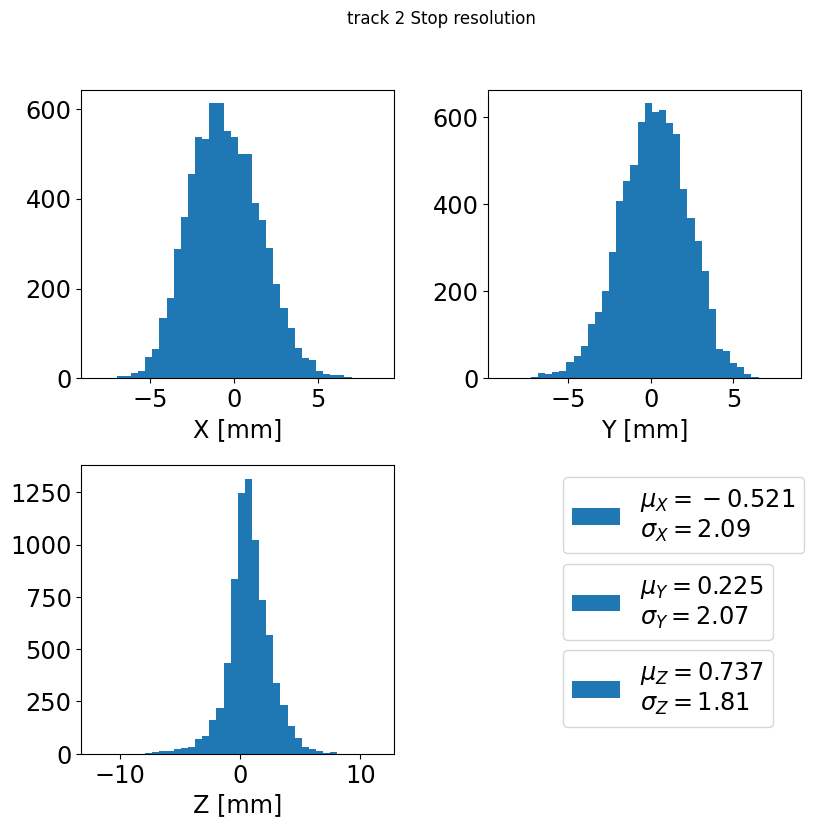

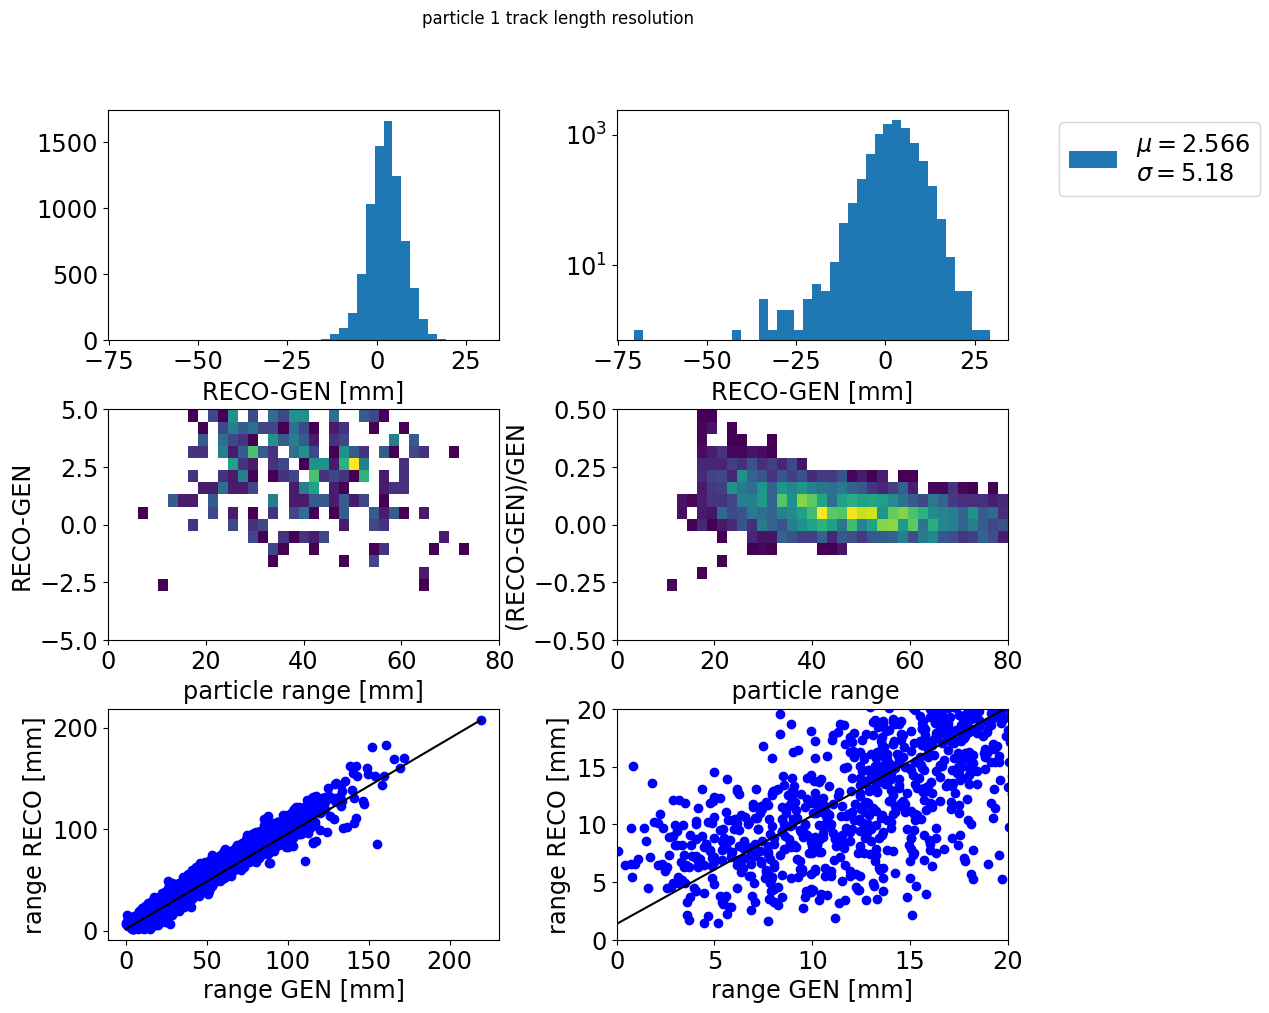

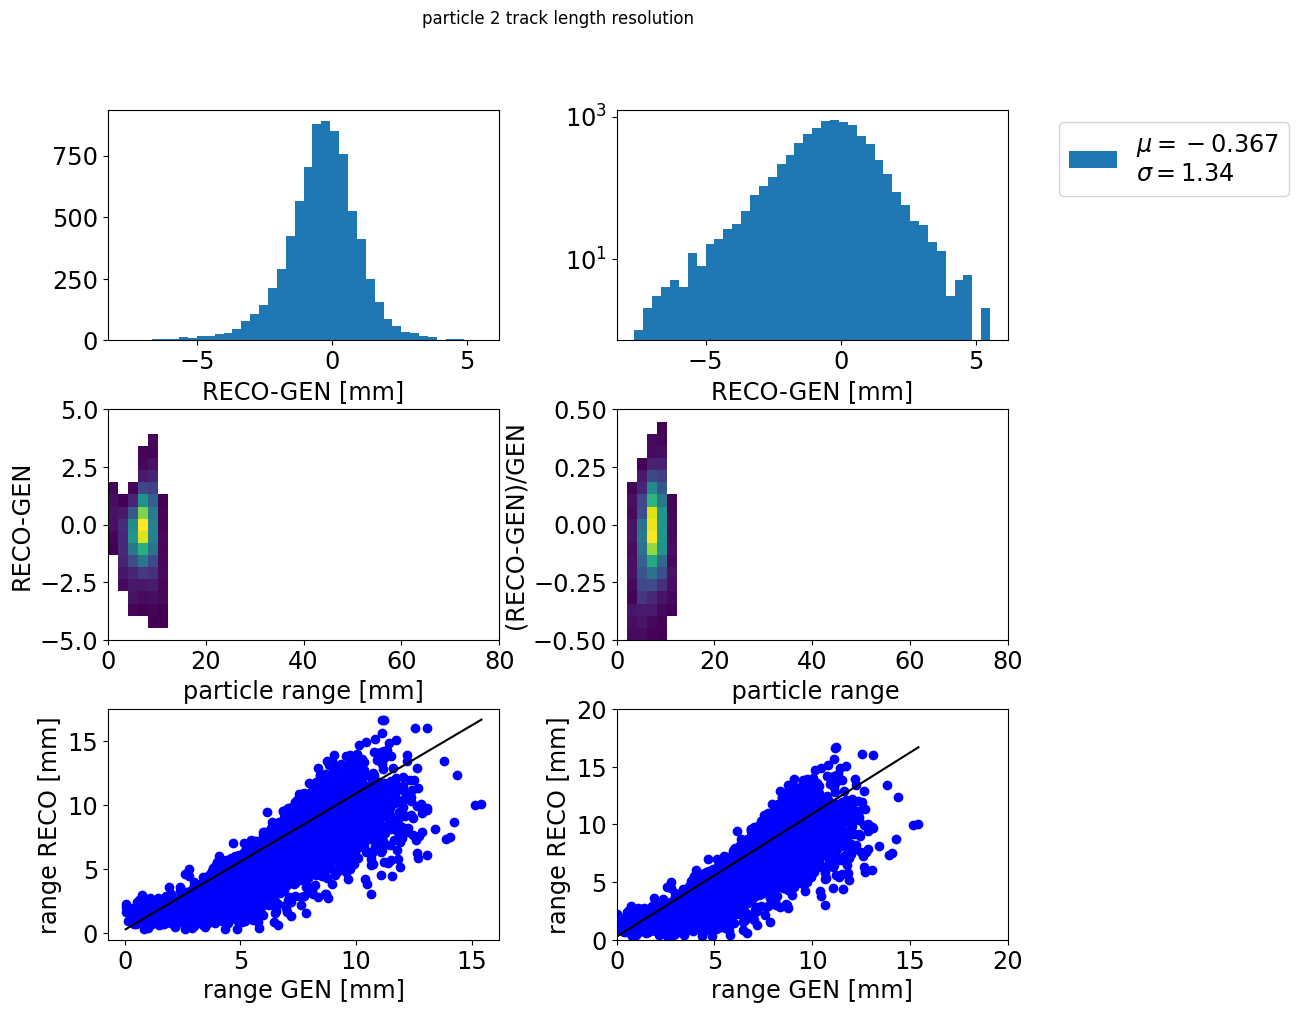

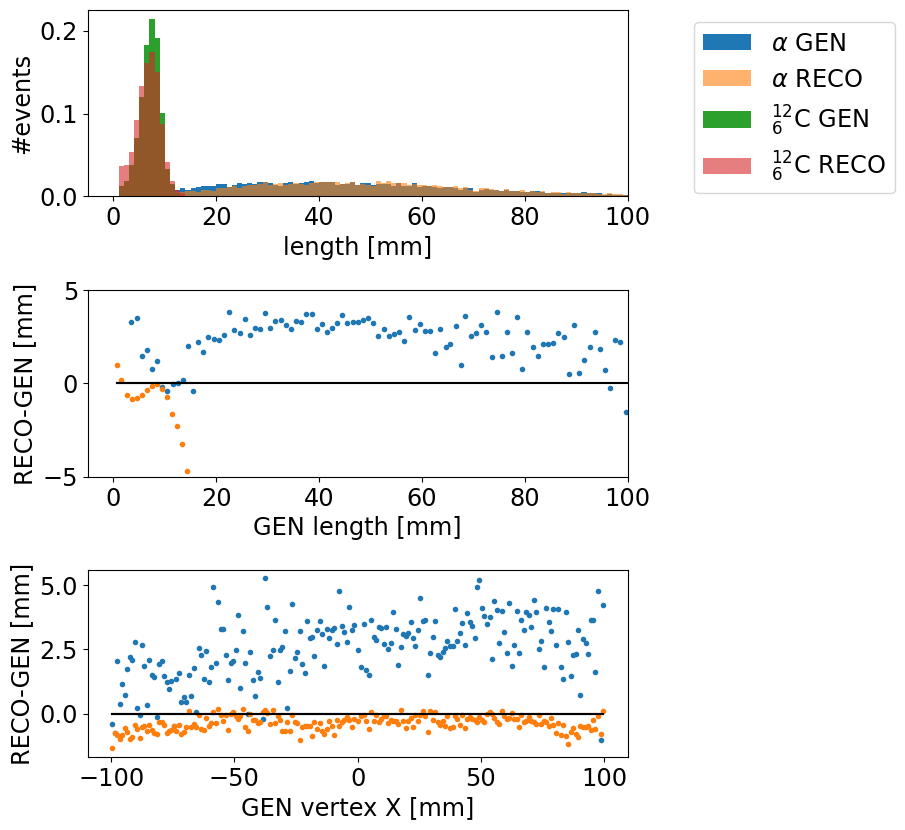

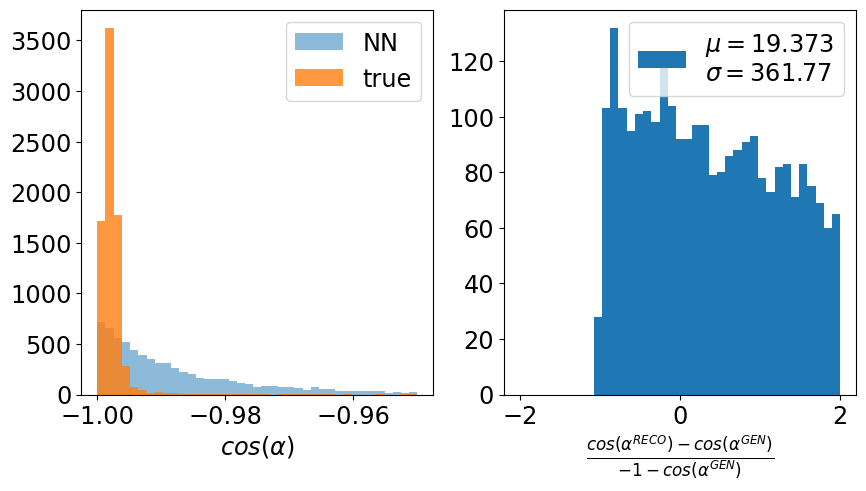

In [7]:
mask = np.abs(df["GEN_StartPosX"] - df["RECO_StartPosX"])<3
df_filtered = df[mask]

mask = np.abs(df_filtered["GEN_StartPosY"] - df_filtered["RECO_StartPosY"])<3
df_filtered = df_filtered[mask]

mask = np.abs(df_filtered["GEN_StopPosX_Part1"] - df_filtered["RECO_StopPosX_Part1"])<10
df_filtered = df_filtered[mask]

print(df_filtered.describe())

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=2)

plf.plotLengthPull(df_filtered, partIdx=1)
plf.plotLengthPull(df_filtered, partIdx=2)
plf.plotLengthPullEvolution(df_filtered)
plf.plotOpeningAngleCos(df_filtered)